Objetivos del taller:
*** Mejorar estrategía de ocupación y se basa en 3 frentes:
Una vez que un cliente realiza una reserva, entender los factores que determinan la duración de la
estadía, la probabilidad de cancelación y la influencia de características como el tipo de
hotel, la composición del grupo de huéspedes o el canal de reservación es vital para el
éxito del negocio ***
  
El dataset suministrado contiene alrededor de 32 columnas y 58895 filas. Contiene información relacionada al servicio de hospedaje ofrecido por un hotel o un resort. Asimismo, contiene informacion del estado y fecha de la reserva, el pais, las personas que se alojaron, el tipo de plan escogido por el usuario, la compañia encargada del pago o de realizar la reserva,entre otras.
Los tipos de datos encontrados en el dataset son: text, boolean, integer, numeric y date.
Top 5 atributos:
* reservation_status      (Cualitativa nominal):,
* hotel                   (Cualitativa nominal),
* stays_in_weekend_nights (cuantitativa discreta),
* stays_in_week_nights    (cuantitativa discreta),
* lead_time               (cuantitativa discreta)

## Load and exploring data

In [1]:
# Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [75]:
pd.set_option("display.max_columns", None)

In [98]:
reservation_df = pd.read_csv("data/hotel_bookings_modified.csv")

C:\Users\suare\AppData\Local\Temp\ipykernel_21380\34777500.py:1: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  reservation_df = pd.read_csv("data/hotel_bookings_modified.csv")


In [5]:
reservation_df.sample(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids
29173,Resort Hotel,0,386,2016.0,October,43,20,0,3,2,...,NaN,NaN,0.0,Transient-Party,60.0,0.0,1.0,Check-Out,2016-10-23,NaN
48914,City Hotel,1,66,20016.0,April,14,2,1,1,1,...,9.0,NaN,0.0,Transient,88.2,0.0,0.0,Canceled,2016-02-21,NaN
7045,Resort Hotel,1,6,2016.0,July,30,18,1,0,1,...,NaN,53.0,0.0,Transient,126.0,0.0,0.0,Canceled,2016-07-14,NaN


In [35]:
reservation_df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                 float64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [8]:
# Showing dataframe dimensions
reservation_df.shape

(58895, 33)

## Univariable Cualitative Analysis

#### Variable hotel

El 68% de las reservas se realizan en el Resort Hotel, lo que lleva a pensar que para el cliente es mas atractivo esta clase de hospedaje porque además de ofrecer hospedaje, ofrece actividades de recreación , descanso y gastronomía.
El resto de las reservas (32%), se hacen en el city hotel.

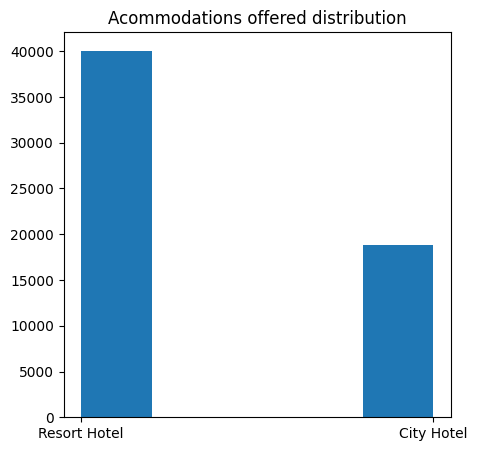

In [11]:
# obtain unique values, count, most repeat value
reservation_df["hotel"].describe()
# Calculating the relative frecuency of accommodations offered
reservation_df["hotel"].value_counts(dropna=False, normalize=True)
# Plotting a histogram for price
plt.figure(figsize=(5, 5))                     
plt.hist(reservation_df["hotel"], bins=5)      
plt.title("Acommodations offered distribution")
plt.show()

#### Variable reservation_status

Cerca del 58% de las reservas son tomadas exitosamente. Hay un 39% de reservas que son canceladas, por lo que es importante analizar que factores conducieron a la cancelación y que oportunidades de mejora se pueden aplicar en la estrategia de  alojamiento del cliente. 

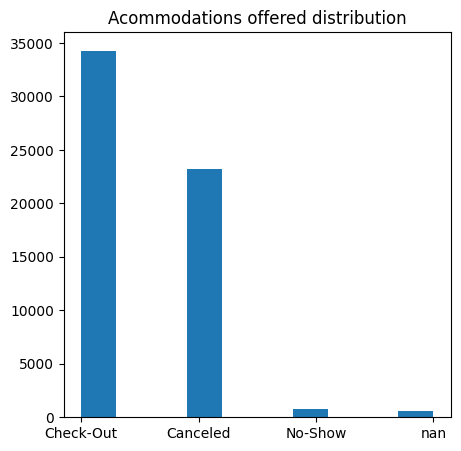

In [37]:
# obtain unique values, count, most repeat value
reservation_df["reservation_status"].describe()
# Calculating the relative frecuency of accommodations offered
reservation_df["reservation_status"].value_counts(dropna=False, normalize=True)
# Plotting a histogram for price
plt.figure(figsize=(5, 5))                     
plt.hist(reservation_df["reservation_status"].astype(str), bins=10)      
plt.title("Acommodations offered distribution")
plt.show()


## Univariable Cuantitative Analysis

#### Variable stays_in_weekend_nights

In [16]:
# obtain unique mean, std, cuantiles,max value
reservation_df["stays_in_weekend_nights"].describe()


count    58895.000000
mean         1.058154
std          1.093032
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         19.000000
Name: stays_in_weekend_nights, dtype: float64

Mean = 1 → en promedio los alojamientos se reservan por 1 dia durante los fines de semana
Q1 (25%) = 0          → El 25% de los alojamientos no se reservan los fines de semana
Q2 (50%, mediana) = 1 → El 50% de los alojamientos de los fines de semana se reservan un dia
Q3 (75%) = 4          → El 75% de los alojamientos de los fines de semana se reservan dos dias o menos
📌 Rango intercuartílico (IQR):
Límite inferior = Q1 - 1.5 × IQR = 2 - 3 = 0    
Límite superior = Q3 + 1.5 × IQR = 4 + 1.5*4 = 10
👉 Entonces, alojamientos que son reservados  ≥ 10 dias los fines de semana se consideran atípicos.

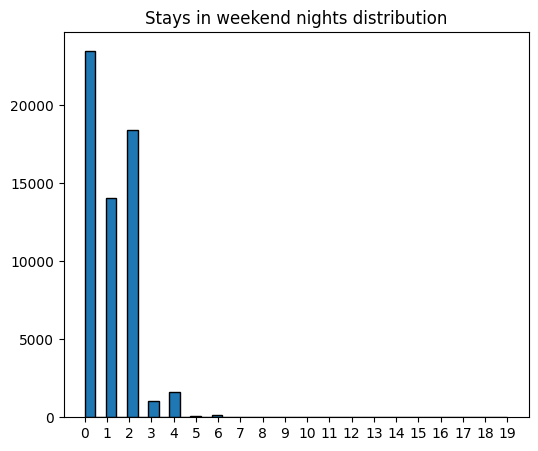

In [17]:

# Calculating the relative frecuency of Stays in weekend nights
reservation_df["stays_in_weekend_nights"].value_counts(dropna=False, normalize=True)

# Plotting a histogram for Stays in weekend nights
bins = 40
plt.figure(figsize=(6, 5))
plt.hist(reservation_df["stays_in_weekend_nights"], bins=bins, edgecolor="black")
plt.title("Stays in weekend nights distribution")
# Forzar que el eje x muestre solo enteros
plt.xticks(np.arange(reservation_df["stays_in_weekend_nights"].min(),
                     reservation_df["stays_in_weekend_nights"].max() + 1, 1))

plt.show()

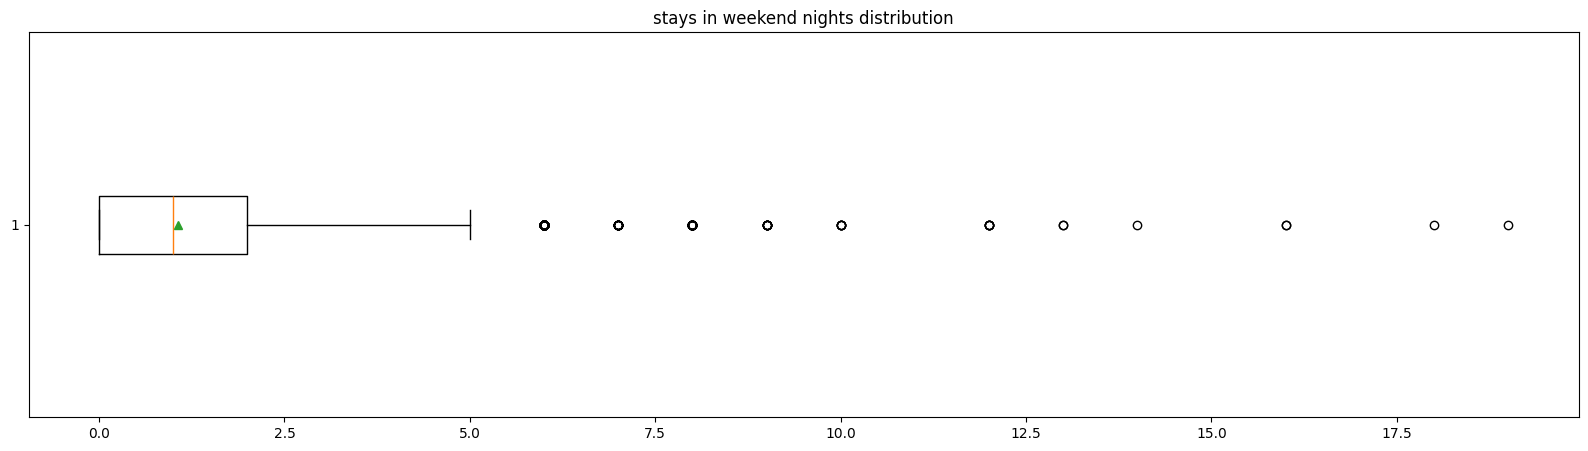

In [18]:

# Plotting a boxplot for number of reviews
plt.figure(figsize=(20, 5))
plt.boxplot(reservation_df["stays_in_weekend_nights"], showmeans=True, vert=False)
plt.title("stays in weekend nights distribution")
plt.show()

La media (triangulo verde) que es 1 esta muy cerca de la mediana (linea naranja ), por lo que la cantidad de valores atipicos es muy baja, es decir, hay simetría en los datos. Asimismo, los valores atipicos empiezan desde los 6 dias de estancia los fines de semana. La mayoria de las reservas (rango intercuartilico  Q3 - Q1), son cortas, entre 1 y 2 noches.

#### Variable lead_time

In [29]:
# obtain unique mean, std, cuantiles,max value
reservation_df["lead_time"].describe()


count    58895.000000
mean       100.050904
std        101.162420
min          0.000000
25%         17.000000
50%         69.000000
75%        157.000000
max        737.000000
Name: lead_time, dtype: float64

Mean = 100 → en promedio los alojamientos se reservan con 100 dias de anticipación (mas de 3 meses de anticipación)
Q1 (25%) = 17          → El 25% de los alojamientos se reservan con 17 dias de antelación
Q2 (50%, mediana) = 69 → El 50% de los alojamientos se reservan con 69 dias de antelación
Q3 (75%) = 157         → El 75% de los alojamientos se reservan con 157 dias de antelación o menos

📌 Rango intercuartílico (IQR):
Límite inferior = Q1 - 1.5 × IQR = 17- 1.5*140  = 0    
Límite superior = Q3 + 1.5 × IQR = 157+1.5*140  = 367

👉 Entonces, alojamientos que son reservados con una antelacion ≥ 367 dias, se consideran valores atipicos

[]

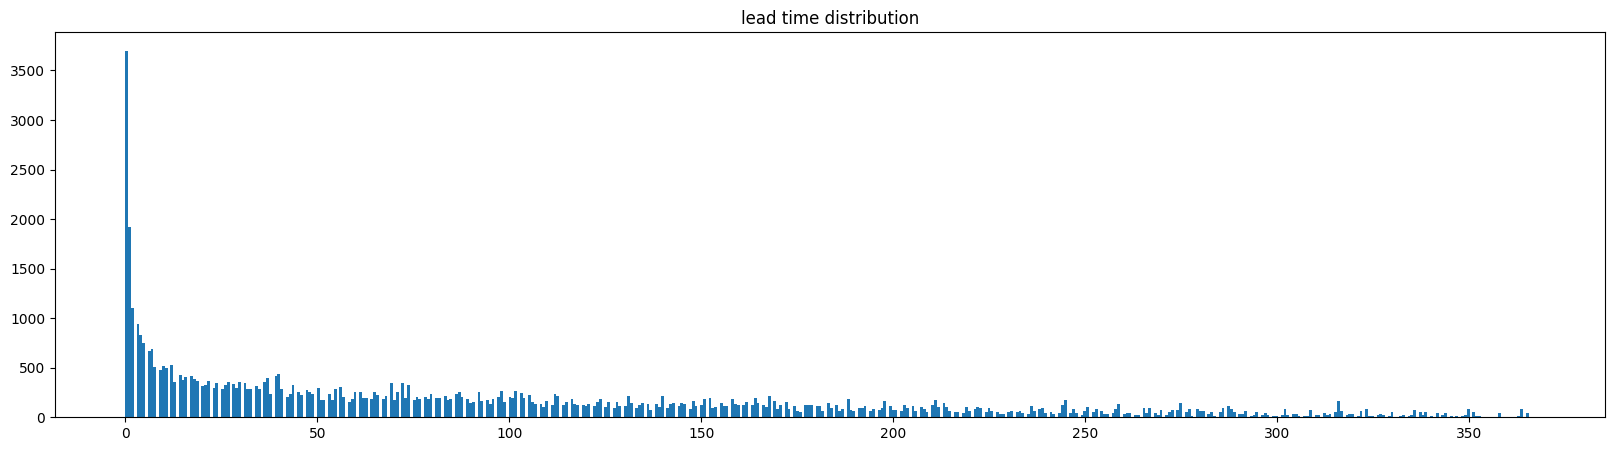

In [46]:

# Calculating the relative frecuency of Stays in weekend nights
q1=reservation_df["lead_time"].quantile(0.25)
q3=reservation_df["lead_time"].quantile(0.75)
iqr=q3-q1
plt.figure(figsize=(20, 5))
plt.hist(reservation_df.loc[reservation_df["lead_time"] <= (q3 + 1.5 * iqr)]["lead_time"], bins=500)
plt.title("lead time distribution")
plt.plot()


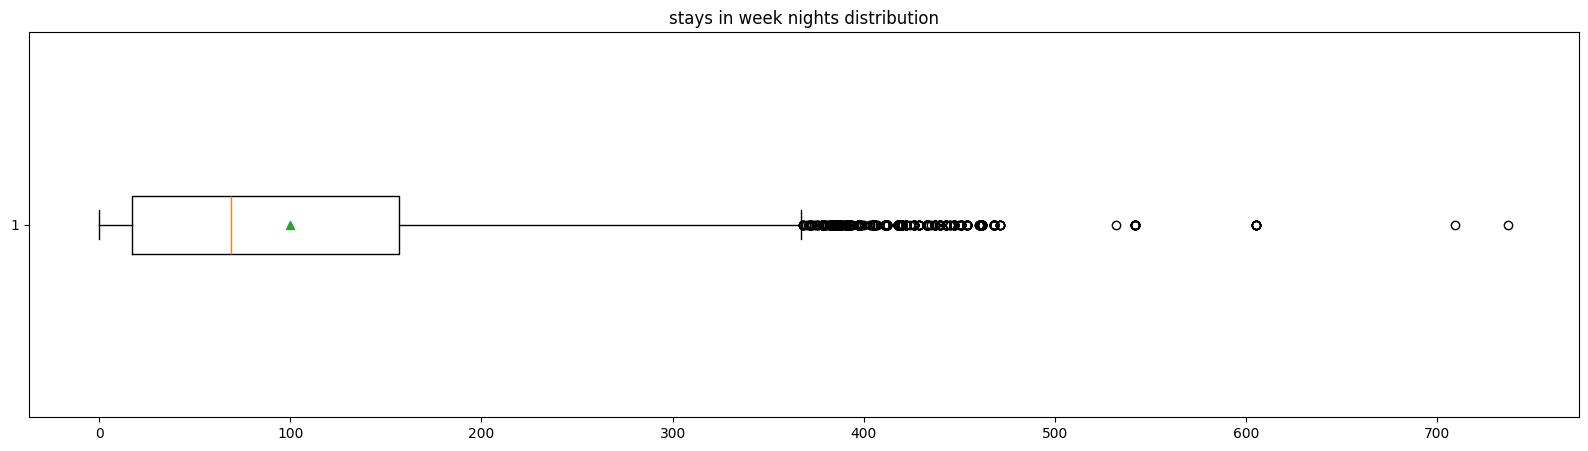

In [39]:

# Plotting a boxplot for number of reviews
plt.figure(figsize=(20, 5))
plt.boxplot(reservation_df["lead_time"], showmeans=True, vert=False)
plt.title("stays in week nights distribution")
plt.show()

La media (triangulo verde) que es 100 esta no tan cerca de la mediana que es 69 dias (linea naranja ), por lo que existe una ligera asimetría positiva en la distribución, causada por la presencia de valores atípicos positivos grandes que están empujando la media hacia la derecha . Asimismo, los valores atipicos empiezan por encima de los 367 dias y se extienden hasta valores muy grandes ( 700 noches). La mayoria de los dias de antelacion de reserva (rango intercuartilico  Q3 - Q1), están entre 25 y 160 dias, lo que representa el comportamiento típico de los clientes.

#### Variable stays_in_week_nights

In [40]:
# obtain unique mean, std, cuantiles,max value
reservation_df["stays_in_week_nights"].describe()


count    58895.000000
mean         2.847576
std          2.235486
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         50.000000
Name: stays_in_week_nights, dtype: float64

Mean = 2.23 → en promedio los alojamientos se reservan por 2 diad entre semana
Q1 (25%) = 1          → El 25% de los alojamientos se reservan por 1 dia
Q2 (50%, mediana) = 2 → El 50% de los alojamientos entre semana se reservan 2 dias
Q3 (75%) = 4          → El 75% de los alojamientos entre semana se reservan 4 dias o menos
📌 Rango intercuartílico (IQR):
Límite inferior = Q1 - 1.5 × IQR = 1-1.5*3 = 0    
Límite superior = Q3 + 1.5 × IQR = 4 + 1.5*3 = 10
👉 Entonces, alojamientos que son reservados  ≥ 10 dias entre semana se consideran atípicos.

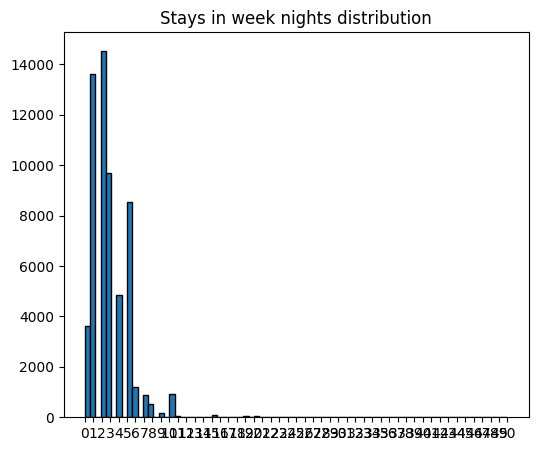

In [41]:

# Calculating the relative frecuency of Stays in weekend nights
reservation_df["stays_in_week_nights"].value_counts(dropna=False, normalize=True)

# Plotting a histogram for Stays in weekend nights
bins = 80
plt.figure(figsize=(6, 5))
plt.hist(reservation_df["stays_in_week_nights"], bins=bins, edgecolor="black")
plt.title("Stays in week nights distribution")
# Forzar que el eje x muestre solo enteros
plt.xticks(np.arange(reservation_df["stays_in_week_nights"].min(),
                     reservation_df["stays_in_week_nights"].max() + 1, 1))

plt.show()

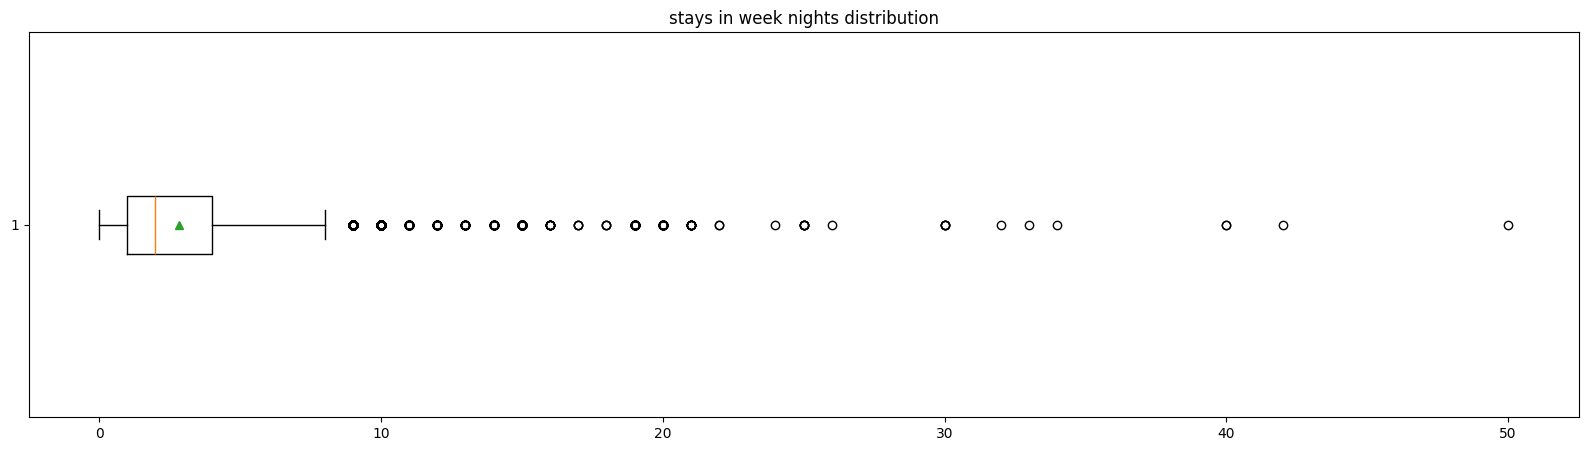

In [42]:

# Plotting a boxplot for number of reviews
plt.figure(figsize=(20, 5))
plt.boxplot(reservation_df["stays_in_week_nights"], showmeans=True, vert=False)
plt.title("stays in week nights distribution")
plt.show()

La media (triangulo verde) que es 2.84 esta no tan cerca de la mediana (linea naranja ), por lo que existe una ligera asimetría positiva en la distribución, causada por la presencia de valores atípicos positivos grandes que están empujando la media hacia la derecha . Asimismo, los valores atipicos empiezan desde las 8 noches de estancia entre semana y se extienden hasta valores muy grandes (50 noches). La mayoria de las reservas (rango intercuartilico  Q3 - Q1), están entre 1 y 4 noches, lo que representa el comportamiento típico de los clientes.

Estrategia de análisis:

La estrategia inicia con la validación y limpieza de los datos de reservas para garantizar su calidad, eliminando valores duplicados, transformación de tipos de datos (entre otros). Posteriormente se realizará un análisis univariado para entender y describir las distribuciones de las variables seleccionadas, empleando medidas de tendencia central, dispersión y gráficos como histogramas y boxplots. Con lo anterior se busca identificar patrones generales y posibles valores atípicos. 

Luego se avanzará con un análisis bivariado para explorar relaciones entre variables, por ejemplo, la influencia del tipo de hotel, el canal de reservación sobre la probabilidad de cancelación. Se utilizará correlaciones y diagramas de dispersión enriquecidos con color por categorías. Finalmente se propondrán visualizaciones que permitan identificar segmentos de clientes y estrategias de precios que contribuyan a reducir cancelaciones y mejorar la ocupación otelera. 

In [99]:
reservation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58895 entries, 0 to 58894
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           58895 non-null  object 
 1   is_canceled                     58895 non-null  int64  
 2   lead_time                       58895 non-null  int64  
 3   arrival_date_year               58307 non-null  float64
 4   arrival_date_month              58895 non-null  object 
 5   arrival_date_week_number        58895 non-null  int64  
 6   arrival_date_day_of_month       58895 non-null  int64  
 7   stays_in_weekend_nights         58895 non-null  int64  
 8   stays_in_week_nights            58895 non-null  int64  
 9   adults                          58895 non-null  int64  
 10  children                        58891 non-null  float64
 11  babies                          58895 non-null  int64  
 12  meal                            

In [101]:
reservation_df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids
0,Resort Hotel,0,342,2015.0,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01,NaN
1,Resort Hotel,0,737,2015.0,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01,NaN
2,Resort Hotel,0,7,2015.0,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02,NaN


In [161]:
reservation_df["arrival_date_year"].unique()

<IntegerArray>
[2015, -9223372036854775808, 20016, 2016, 2017]
Length: 5, dtype: Int64

In [162]:
df_reservation_mod = reservation_df

In [163]:
cast_columns_int = ["arrival_date_year","children","days_in_waiting_list","required_car_parking_spaces","total_of_special_requests","agent"]
cast_columns_date = ["reservation_status_date"]
columns_object = df_reservation_mod.select_dtypes(include="object").columns

In [164]:
# transformación columnas enteras

for i in cast_columns_int:
    df_reservation_mod[i]=(
    pd.to_numeric(df_reservation_mod[i], errors="coerce")
      .round()
      .astype("Int64")
    )

In [165]:
# transformación columnas fecha

for i in cast_columns_date:
    df_reservation_mod[i]=(
    pd.to_datetime(df_reservation_mod[i], errors="coerce")
    )

In [166]:
# Limpieza espacios columnas object

for i in columns_object:
    df_reservation_mod[i]=(
    df_reservation_mod[i].str.strip()
    )

Se identifican 13.340 valores nulos (valores iguales en todas sus columnas, en el dataset no hay una llave por la cual agrupar).

In [167]:
df_reservation_mod.duplicated().sum()

np.int64(13345)

In [168]:
dups_all = df_reservation_mod[df_reservation_mod.duplicated(keep=False)].sort_values(list(df_reservation_mod.columns))
dups_all.head(4)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids
40772,City Hotel,0,0,2015,August,32,7,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,14,NaN,0,Transient,75.0,0,1,Check-Out,2015-08-09,NaN
40802,City Hotel,0,0,2015,August,32,7,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,14,NaN,0,Transient,75.0,0,1,Check-Out,2015-08-09,NaN
40821,City Hotel,0,0,2015,August,32,8,0,1,2,0,0,SC,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NaN,0,Transient,89.0,0,1,Check-Out,2015-08-09,NaN
40838,City Hotel,0,0,2015,August,32,8,0,1,2,0,0,SC,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NaN,0,Transient,89.0,0,1,Check-Out,2015-08-09,NaN


In [169]:
df_reservation_mod = df_reservation_mod.drop_duplicates()

In [172]:
cond = df_reservation_mod["lead_time"] > 0
df_filtrado = df_reservation_mod[cond]

In [173]:
df_filtrado

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,<NA>,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,NaN
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,<NA>,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,NaN
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,<NA>,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,NaN
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,NaN
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58878,City Hotel,1,131,2016,October,43,17,1,1,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,NaN,0,Transient,132.3,0,0,Canceled,2016-10-11,NaN
58879,City Hotel,1,605,2016,October,43,17,1,2,2,0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1,NaN,0,Transient,60.0,0,0,Canceled,2016-09-20,NaN
58881,City Hotel,1,48,2016,October,43,17,1,2,2,0,0,SC,NLD,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NaN,0,Transient,126.0,0,1,Canceled,2016-10-11,NaN
58882,City Hotel,1,234,2016,October,43,17,1,2,1,0,0,BB,PRT,Corporate,Corporate,0,0,0,E,E,0,Non Refund,<NA>,51,0,Transient-Party,106.0,0,0,Canceled,2016-08-29,NaN


- hotel 
- lead_time (Nos podría dar pistas de si a mayor tiempo mas cancelaciones)
- deposit_type 
- days_in_waiting_list
- reservation_status